In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import root_mean_squared_error as rmse
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)

In [2]:
input_file = "cars_data.csv"

df = pd.read_csv(input_file, header = 0)

In [3]:
X_cars = df.to_numpy()

In [4]:
y = X_cars[:,0].reshape(-1,1)
X = np.delete(X_cars, 0, 1)

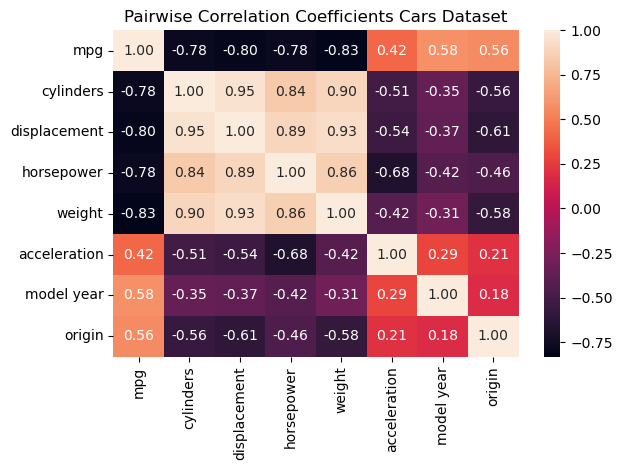

In [5]:
# setting numeric_only parameter b/c of car name variable
# correlation matrix more useful than pairplot because the output is
# smaller and the numeric values are easier to comprehend quickly.

corr = df.corr(numeric_only = True)
ax = sns.heatmap(corr, xticklabels=True, yticklabels=True, annot=True, fmt='.2f')
ax.set_title("Pairwise Correlation Coefficients Cars Dataset")
plt.tight_layout()
plt.savefig("pairwise_corr_cars.jpg")
plt.show()

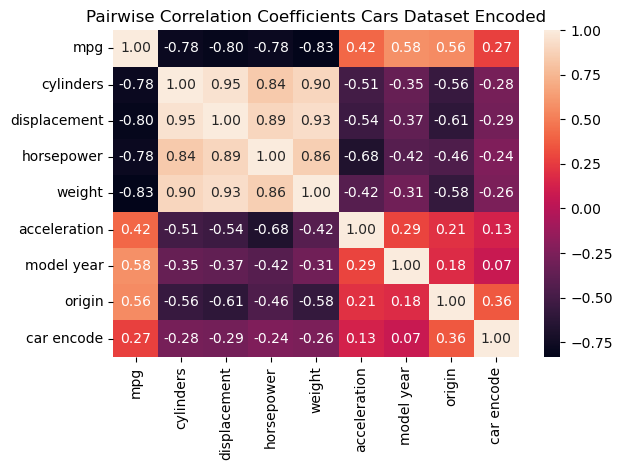

In [6]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
df_cars = df[['car name']]
# print(df_cars.shape)
# print(type(df_cars))
car_encoded = ord_encoder.fit_transform(df_cars)
# print(type(car_encoded))
# print(car_encoded.shape)
# print(len(np.unique(car_encoded)))
array_df = pd.DataFrame(car_encoded,columns=['car encode'])
combined_df = pd.concat([df,array_df],axis=1)
# print(combined_df.shape)
# print(combined_df.columns)
corr_encoded = combined_df.corr(numeric_only=True)
ax = sns.heatmap(corr_encoded, xticklabels=True, yticklabels=True, annot=True, fmt='.2f')
ax.set_title("Pairwise Correlation Coefficients Cars Dataset Encoded")
plt.tight_layout()
plt.savefig("pairwise_corr_cars_encoded.jpg")
plt.show()

### Questions p.3
1. Based on the correlation matrix weight, displacement, horsepower, and cylinders are the most important features in predicting gas mileage. These 4 variables have correlation coefficients less than or equal to -0.78 which shows they have a strong negative correlation with mpg.
2. The features that don't seem useful are acceleration, model year, and origin. These variables have correlations less than or equal to 0.58 which shows a weak positive correlation. They are not useful because the correlation between them and mpg is nowhere near as strong as the other 4 variables. Additionally, you cannot rely on pearson correlation coefficients for categorical variables.

In [7]:
# I chose to use weight as my independent variable
# used np.all of a comparison between my numpy array and the numpy
# array of the weight column from the dataframe to check correct variable used
X_weight = X_cars[:,4].reshape(-1, 1)
comp = X_weight == np.asarray(df['weight']).reshape(-1, 1)
print(np.all(comp))

True


### Question p.4 

In linear regression it is not necessary to scale the data before performing the regression. This is because linear regression does not rely on distance in the calculation (as opposed to SVM) and solves a closed form mathematical soution. When using linear regression with gradient descent it is important to scale the features to help the model converge faster. Another data cleaning note, the cars dataset does not have null values therefore we don't need to deal with missing features.

In [8]:
X_wght_train, X_wght_test, y_train, y_test = train_test_split(X_weight, y, test_size = 0.2, random_state = 42)

In [9]:
lr = LinearRegression()
lr.fit(X_wght_train,y_train)

LinearRegression()

In [10]:
print(f"The linear regression equation is y = {lr.coef_[0][0]:.3f}x + {lr.intercept_[0]:.3f}")

The linear regression equation is y = -0.008x + 46.782


In [11]:
r2_weight = lr.score(X_wght_test, y_test)
y_wght_pred = lr.predict(X_wght_test)
print(f"The R squared value of the model is: {r2_weight}")
print(f"The mean squared error of the model is: {mse(y_test, y_wght_pred)}")

The R squared value of the model is: 0.722971057303075
The mean squared error of the model is: 14.894861064636194


In [12]:
residuals = y_test - y_wght_pred

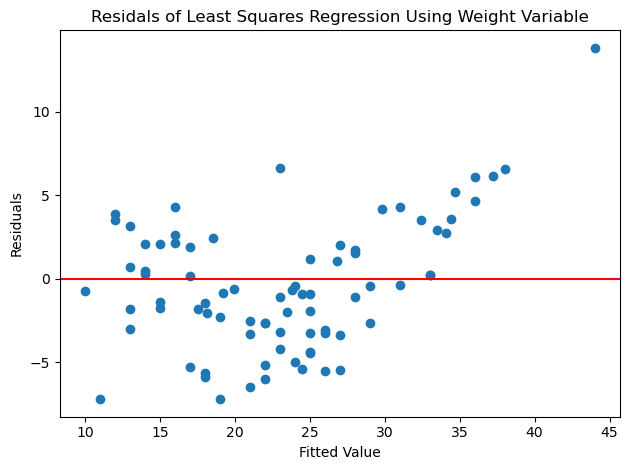

In [13]:
plt.scatter(y_test, residuals)
plt.title("Residals of Least Squares Regression Using Weight Variable")
plt.ylabel("Residuals")
plt.xlabel("Fitted Value")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.tight_layout()
plt.savefig("residuals_LS_weight.jpg")
plt.show()

### Exercises pp. 4-5
2. The R squared value of the model is approximately 72% and the mean squared error is 14.9. This shows the model is doing a fairly good job of estimating the values.
3. As shown in the chart below, the residuals are not randomly scattered around zero. It looks like they have a quadratic shape or at least a positive slope as the fitted values become larger. This shows the model is not doing a great job of predicting the values because if they were they'd have the same degree of scaettering everywhere.
4. For a univariate model, this does a fair job at estimating the data. However, there are some concerns, namely the residuals plot does not have constant variability and the R squared seems a bit low. As shown in the regression line overlay chart below, for cars with low weight the model is doing a poor job estimating their MPG. From the regression coefficient we see that MPG and weight have a negative relationship.

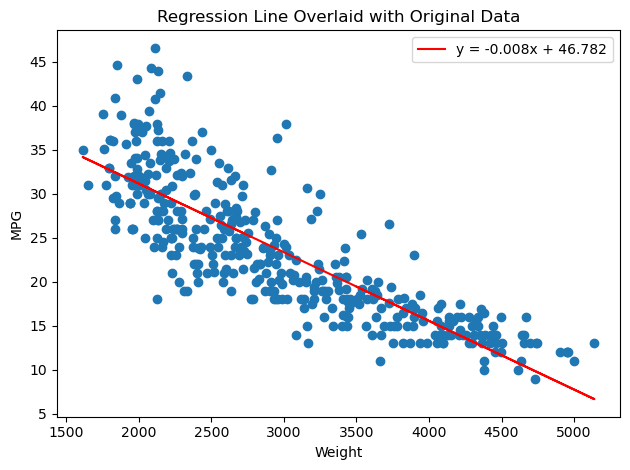

In [14]:
ax = plt.scatter(X_weight, y)
plt.plot(X_weight, [(i*lr.coef_[0][0] + lr.intercept_) for i in X_weight], color = 'red', \
         label= f"y = {lr.coef_[0][0]:.3f}x + {lr.intercept_[0]:.3f}")
plt.ylabel("MPG")
plt.xlabel("Weight")
plt.title("Regression Line Overlaid with Original Data")
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig("weight_reg_w_line_data.jpg")
plt.show()

In [15]:
# The second feature I chose to use was displacement. This had the second largest correlation at -0.80 for MPG.
# I left the size of the test set the same to better compare the models

X_displace = df['displacement'].to_numpy().reshape(-1, 1)
X_disp_train, X_disp_test, y_disp_train, y_disp_test = train_test_split(X_displace, y, test_size = 0.2, random_state = 42)

In [16]:
lr2 = LinearRegression()
lr2.fit(X_disp_train, y_disp_train)

LinearRegression()

In [17]:
r2_disp = lr2.score(X_disp_test, y_disp_test)
y_pred_disp = lr2.predict(X_disp_test)

print(f"The R square of the model using Displacement is: {r2_disp}")
print(f"The MSE of the model using displacement is: {mse(y_disp_test, y_pred_disp)}")

The R square of the model using Displacement is: 0.6633114869465596
The MSE of the model using displacement is: 18.102543998358946


In [18]:
residuals_disp = y_disp_test - y_pred_disp

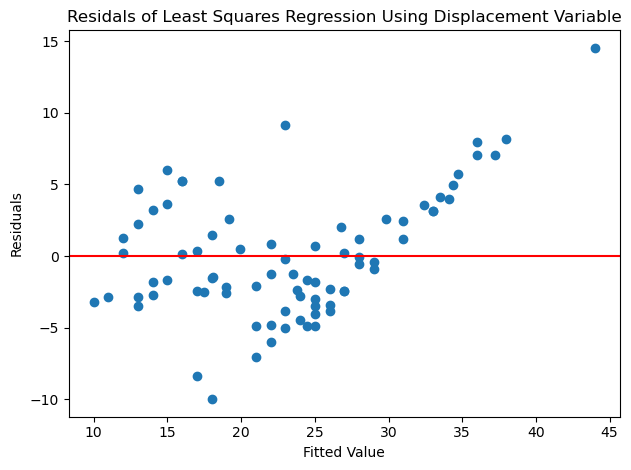

In [19]:
plt.scatter(y_disp_test, residuals_disp)
plt.title("Residals of Least Squares Regression Using Displacement Variable")
plt.ylabel("Residuals")
plt.xlabel("Fitted Value")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.tight_layout()
plt.savefig("residuals_LS_displace.jpg")
plt.show()

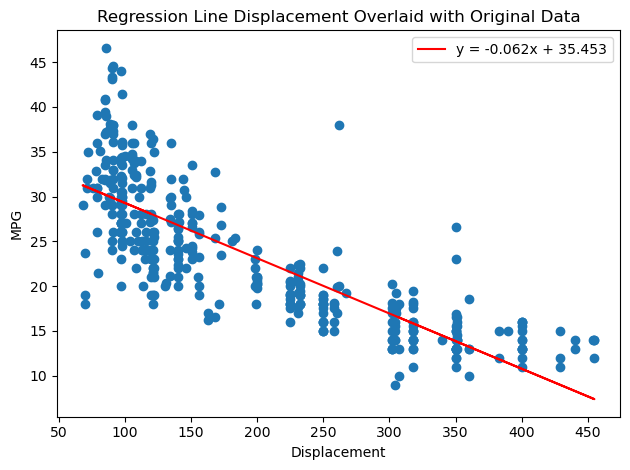

In [20]:
ax = plt.scatter(X_displace, y)
plt.plot(X_displace, [(i*lr2.coef_[0][0] + lr2.intercept_) for i in X_displace], color = 'red', \
         label= f"y = {lr2.coef_[0][0]:.3f}x + {lr2.intercept_[0]:.3f}")
plt.ylabel("MPG")
plt.xlabel("Displacement")
plt.title("Regression Line Displacement Overlaid with Original Data")
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig("displace_reg_w_line_data.jpg")
plt.show()

### Univariate Regression Questions p.5
Looking at the second regression using displacement as the independent variable, the model performed worse than the first model using weight. This isn't surprising given the dependent variable MPG is more correlated with weight. The R squared of the model is 61.4 percent and the mean squared error is 24.7. This represents a steep descline in both of the metrics. Additionally, seeing a larger MSE is indicative of a lower R squared because MSE, nowithstanding the 1/n, is the numerator of the fraction in R squared. Therefore, as MSE goes up we'd expect to see R squared go down. Finally, the residuals plot is also concerning because the residuals are not constant and randomly scattered around zero, similar to the first model.

### Multivariate Regression
#### Weight, Horsepower

In [21]:
#I picked the features weight and horsepower

# When splitting the data, I increased the test size to 0.3

X_multivariate = df.loc[:,[ 'weight','horsepower']].to_numpy().reshape(-1, 2)
# X_multivariate = df.loc[:,['weight', 'model year']]
# X_multivariate = df.loc[:,['weight', 'horsepower']].to_numpy().reshape(-1, 2)

X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multivariate, y, test_size = 0.3, random_state = 42)


In [22]:
# scaler = StandardScaler()
# x_multi_train_scale = scaler.fit_transform(X_multi_train)
# x_multi_test_scale = scaler.transform(X_multi_test)

lr3 = LinearRegression()
# lr3.fit(x_multi_train_scale, y_multi_train)
lr3.fit(X_multi_train, y_multi_train)

# r2_multi = lr3.score(x_multi_test_scale, y_multi_test)
r2_multi = lr3.score(X_multi_test, y_multi_test)
# y_multi_pred = lr3.predict(x_multi_test_scale)
y_multi_pred = lr3.predict(X_multi_test)

print(f"The R squared of multivariate model is: {r2_multi}")
print(f"The MSE of the multivariate model is: {mse(y_multi_test, y_multi_pred)}")
print(f"The linear regression equation is y = {lr3.coef_[0][0]:.3f}x1 + {lr3.coef_[0][1]:.3f}x2 + {lr3.intercept_[0]:.3f}")

The R squared of multivariate model is: 0.729022866681583
The MSE of the multivariate model is: 15.551747263845233
The linear regression equation is y = -0.006x1 + -0.055x2 + 46.522


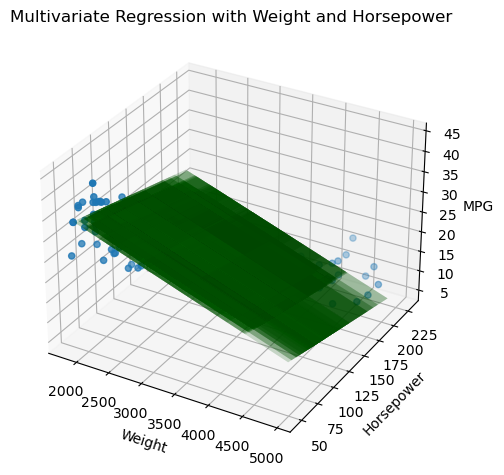

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_3d_plot = X_multi_test[:,0].reshape(-1,1)
y_3d_plot = X_multi_test[:,1].reshape(-1,1)
z_3d_plot = y_multi_test
ax.scatter(x_3d_plot, y_3d_plot, z_3d_plot)
x_plane, y_plane = np.meshgrid(x_3d_plot, y_3d_plot)
z_plane = lr3.coef_[0][0] * x_plane + lr3.coef_[0][1] * y_plane + lr3.intercept_[0]

ax.plot_surface(x_plane, y_plane, z_plane, alpha = 0.1, color = 'g')

ax.set_xlabel("Weight")
ax.set_ylabel("Horsepower")
ax.set_zlabel("MPG")
plt.title("Multivariate Regression with Weight and Horsepower")
plt.tight_layout()
plt.savefig("two_var_regression.jpg")

#### All Variables

In [24]:
# Because the dataset included a non-numeric variable, car name, and we weren't 
# told to drop it, I used the encoded version of the variable
print(combined_df.columns)
X_all = combined_df.drop(['mpg', 'model year', 'origin', 'car name'], axis = 1 ).to_numpy().reshape(-1, 6)
# X_all = combined_df.drop(['mpg', 'acceleration', 'origin', 'car name', 'car encode'], axis = 1 ).to_numpy().reshape(-1, 5)
print(X_all.shape)
print(y.shape)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'car encode'],
      dtype='object')
(398, 6)
(398, 1)


In [25]:
# With weight and model year r2 is 0.83305
# With weight, model year, cylinders r2 is 0.83322
# With weight, model year, cylinders, displacement r2 is 0.826538
# With weight, model year, cylinders, displacement, horsepower r2 is 0.827436
x_all_train, x_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size = 0.2, random_state = 42)

lr4 = LinearRegression()
lr4.fit(x_all_train, y_all_train)

r2_all = lr4.score(x_all_test, y_all_test)
y_all_pred = lr4.predict(x_all_test)

print(f"The R squard of the all variable model is: {r2_all}")
print(f"The MSE of the multivariate model is: {mse(y_all_test, y_all_pred)}")

The R squard of the all variable model is: 0.7255383148343306
The MSE of the multivariate model is: 14.75682875699017


# Kernel Ridge Regression

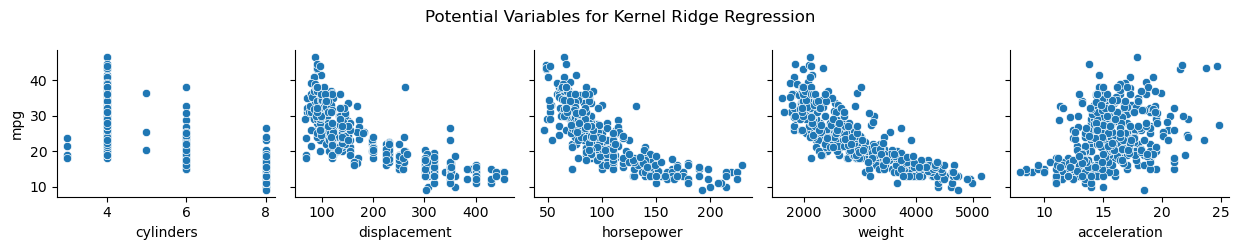

In [26]:
# Using the plot below I decided to use weight. It seems to have a non-linear relationship and was
# previously used in the linear regression. When plotting the linear residuals there seemed to be
# a non linear trend as well.
potential_indep_vars = [i for i in df.columns if i not in {'mpg', 'model year', 'origin', 'car name'}]
ax = sns.pairplot(data=df, x_vars = potential_indep_vars, y_vars ='mpg')
plt.suptitle("Potential Variables for Kernel Ridge Regression")
plt.tight_layout()
plt.savefig("pot_vars_krr.jpg")
plt.show()

In [27]:

x_krr = df['weight'].to_numpy().reshape(-1, 1)
scaler = StandardScaler()
# x_krr = scaler.fit_transform(pre_x_krr)
# x_multi_test_scale = scaler.transform(X_multi_test)

In [28]:
def one_feat_poly_kernel(train_size, degree, alpha):
    pre_x_krr_p2_train, pre_x_krr_p2_test, y_krr_p2_train, y_krr_p2_test = train_test_split(x_krr, y, train_size = train_size, random_state = 42)
    x_krr_p2_train = scaler.fit_transform(pre_x_krr_p2_train)
    x_krr_p2_test = scaler.transform(pre_x_krr_p2_test)
    kr_p2 = KernelRidge(kernel = 'polynomial', degree=degree, alpha = alpha)
    kr_p2.fit(x_krr_p2_train, y_krr_p2_train)
    
    r2_krr = kr_p2.score(x_krr_p2_test, y_krr_p2_test)
    kr_pred_test = kr_p2.predict(x_krr_p2_test)
    kr_pred_train = kr_p2.predict(x_krr_p2_train)
    
    if train_size == 0.8:
        print(f"The R squared is: {r2_krr}")
        print(f"The MSE is: {mse(y_krr_p2_test,kr_pred_test)}")
    
    return (rmse(y_krr_p2_test, kr_pred_test), rmse(y_krr_p2_train, kr_pred_train))

The R squared is: 0.757086063353583
The MSE is: 13.060618510790647


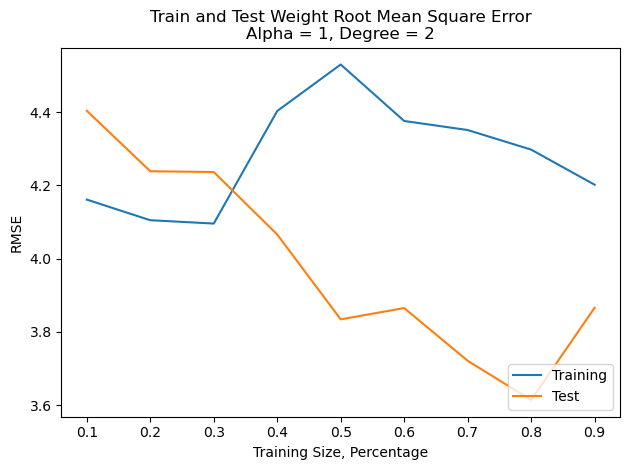

In [29]:
def plot_rms(degree, alpha):
    train_rmse, test_rmse = [], []
    for i in range(1, 10):
        test, train = one_feat_poly_kernel(i/10, degree, alpha)
        train_rmse.append(train)
        test_rmse.append(test)
    
    x_axis = [i/10 for i in range(1,10)]
    plt.plot(x_axis, train_rmse, label="Training")
    plt.plot(x_axis, test_rmse, label="Test")
    plt.title(f"Train and Test Weight Root Mean Square Error\nAlpha = {alpha}, Degree = {degree}")
    plt.xlabel("Training Size, Percentage")
    plt.ylabel("RMSE")
    plt.tight_layout()
    plt.legend(loc = 'lower right')
    plt.savefig(f"rmse_plot_alp_{alpha}_deg_{degree}.jpg")
    plt.show()
plot_rms(2,1)

The R squared is: 0.7602467823742953
The MSE is: 12.890677889353961


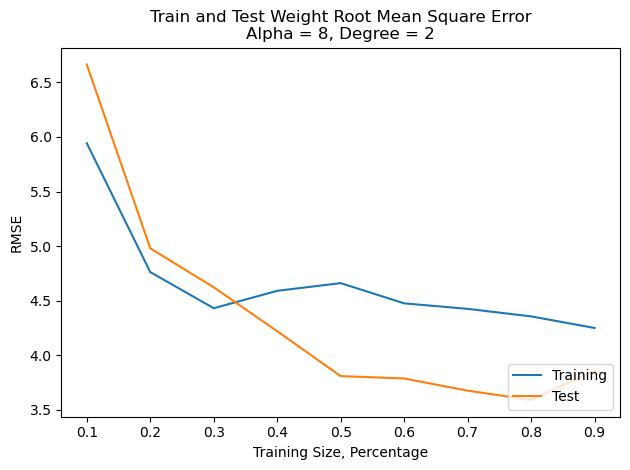

In [30]:
plot_rms(2, 8)

The R squared is: 0.757076966700821
The MSE is: 13.061107605459682


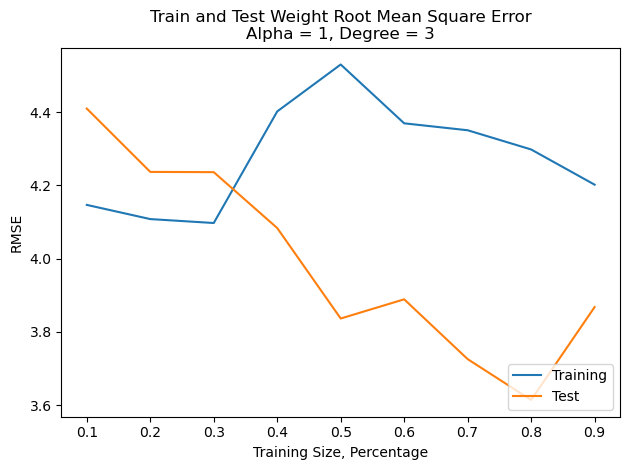

In [31]:
plot_rms(3,1)

The R squared is: 0.759706370660822
The MSE is: 12.919733905348266


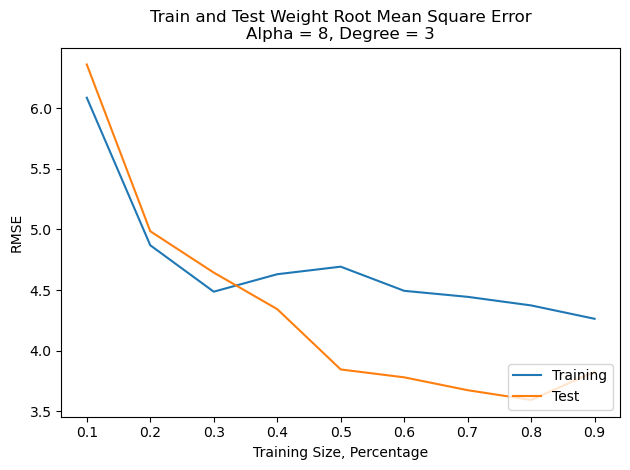

In [32]:
plot_rms(3,8)

In [33]:
x2_krr = df.loc[:,['weight', 'horsepower']].to_numpy().reshape(-1,2)

In [34]:
def two_feat_poly_kernel(train_size, degree, alpha):
    pre_x_krr_p2_train, pre_x_krr_p2_test, y_krr_p2_train, y_krr_p2_test = train_test_split(x2_krr, y, train_size = train_size, random_state = 42)
    x_krr_p2_train = scaler.fit_transform(pre_x_krr_p2_train)
    x_krr_p2_test = scaler.transform(pre_x_krr_p2_test)
    kr_p2 = KernelRidge(kernel = 'polynomial', degree=degree, alpha = alpha)
    kr_p2.fit(x_krr_p2_train, y_krr_p2_train)
    
    r2_krr = kr_p2.score(x_krr_p2_test, y_krr_p2_test)
    kr_pred_test = kr_p2.predict(x_krr_p2_test)
    kr_pred_train = kr_p2.predict(x_krr_p2_train)
    
    if train_size == 0.8:
        print(f"The R squared is: {r2_krr}")
        print(f"The MSE is: {mse(y_krr_p2_test,kr_pred_test)}")
    
    return (rmse(y_krr_p2_test, kr_pred_test), rmse(y_krr_p2_train, kr_pred_train))

def plot2_rms(degree, alpha):
    train_rmse, test_rmse = [], []
    for i in range(1, 10):
        test, train = two_feat_poly_kernel(i/10, degree, alpha)
        train_rmse.append(train)
        test_rmse.append(test)
    
    x_axis = [i/10 for i in range(1,10)]
    plt.plot(x_axis, train_rmse, label="Training")
    plt.plot(x_axis, test_rmse, label="Test")
    plt.title(f"Train and Test Weight and Horsepower Root Mean Square Error\nAlpha = {alpha}, Degree = {degree}")
    plt.xlabel("Training Size, Percentage")
    plt.ylabel("RMSE")
    plt.tight_layout()
    plt.legend(loc = 'lower right')
    plt.savefig(f"rmse_plot_alp_{alpha}_deg_{degree}.jpg")
    plt.show()

The R squared is: 0.780759648565067
The MSE is: 11.787774023156558


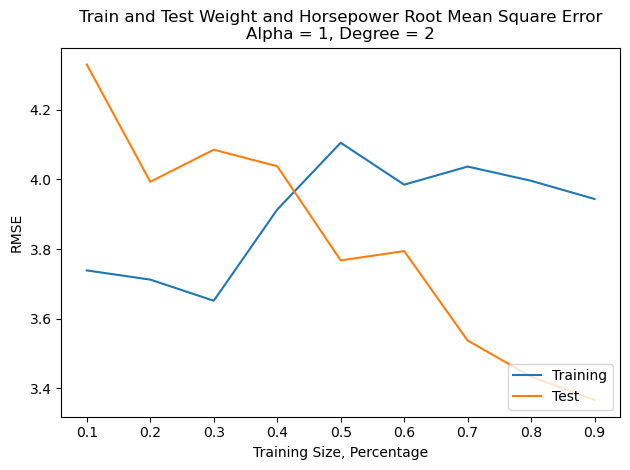

In [35]:
plot2_rms(2,1)

The R squared is: 0.7688029856609526
The MSE is: 12.430641266628335


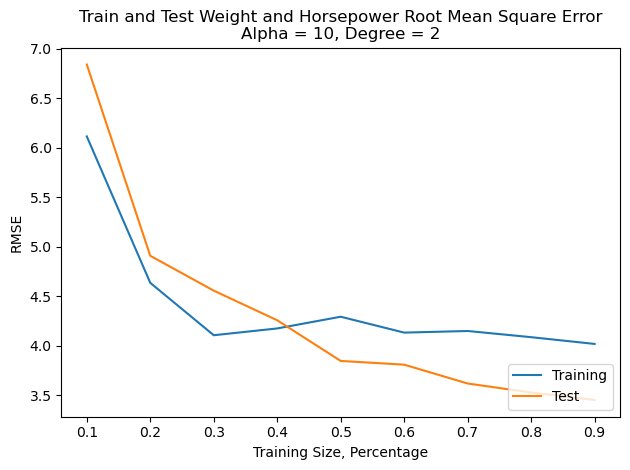

In [36]:
plot2_rms(2, 10)

The R squared is: 0.7792983685584162
The MSE is: 11.866341852437149


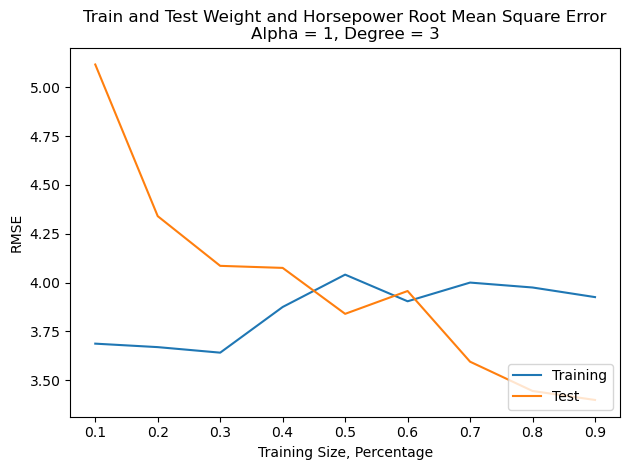

In [37]:
plot2_rms(3,1)

The R squared is: 0.7654986427754604
The MSE is: 12.608304032511866


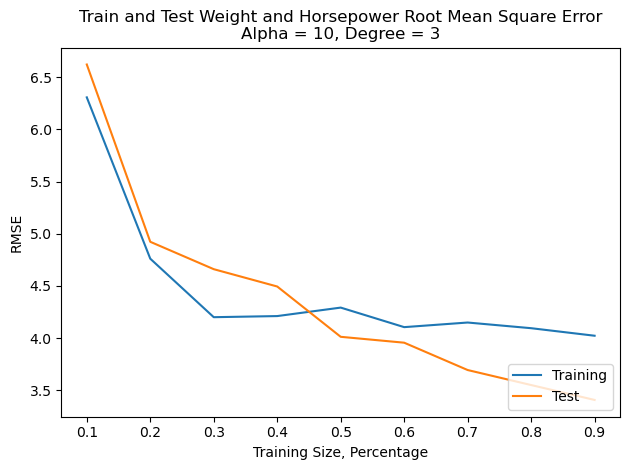

In [38]:
plot2_rms(3,10)